#Twelve Data API

In [24]:
# import pandas as pd
# import requests
# import json

In [25]:
# api_key = '9439281b2cda4dd59f6398f2b4b867a0'

# symbol = 'BTC/USD'

# interval = '8h'

# order = 'asc'

# start_date = '2014-10-01'

# end_date = '2021-10-20'

In [26]:
# api_url = f'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&order={order}&symbol={symbol}&start_date={start_date}&end_date={end_date}'

# data = requests.get(api_url).json()
# data


In [27]:
# data_final = pd.DataFrame(data['values'])
# print(data_final)

#Yahoo Finance

##Data Collection and features

In [28]:
!pip install yfinance


In [29]:
!pip install pandas_ta

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'BTC-USD', start = None ,end = None, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [31]:
data.reset_index(inplace=True)
data.head(15)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [32]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3585,2024-07-11,57729.890625,59299.433594,57120.378906,57344.914062,57344.914062,28707803842
3586,2024-07-12,57341.195312,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
3587,2024-07-13,57908.738281,59787.078125,57796.441406,59231.953125,59231.953125,17080061806
3588,2024-07-14,59225.250000,61329.527344,59225.250000,60787.792969,60787.792969,22223416061
3589,2024-07-15,60815.457031,64534.398438,60704.929688,64386.003906,64386.003906,37594984448


In [33]:
# Adding indicators
# data['SMA']=ta.sma(data['Adj Close'], length=13)
data['EMA']=ta.ema(data['Adj Close'], length=14)
data['RSI']=ta.rsi(data['Adj Close'], length=14)

# Calculate MACD and extract its components
macd = ta.macd(data['Adj Close'], fast=13, slow=26, signal=9)
data['MACD']=macd['MACD_13_26_9']         #macd line
# data['MACD_SIGNAL'] = macd['MACDs_13_26_9'] #macd signal line    -----
# data['MACD_HIST'] = macd['MACDh_13_26_9']   #macd histogram      -----

data['ATR']=ta.atr(data['High'], data['Low'], data['Adj Close'])

data['OBV']=ta.obv(data['Adj Close'], data['Volume'])

data['CCI']=ta.cci(data['High'], data['Low'], data['Adj Close'], length=14)

data[['ADX_14', 'DMP_14', 'DMN_14']] = ta.adx(data['High'], data['Low'], data['Adj Close'])


data['TargetNextClose'] = data['Adj Close'].shift(-1)

# data.dropna(inplace=True)
# data.reset_index(inplace = True)
data.isna().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
EMA                13
RSI                14
MACD               25
ATR                14
OBV                 0
CCI                13
ADX_14             27
DMP_14             14
DMN_14             14
TargetNextClose     1
dtype: int64

##Data preparation

In [34]:
data.drop(['Close','DMP_14', 'DMN_14'], axis=1, inplace=True)

In [35]:
data.dropna(inplace=True)

In [36]:
data.head()

,Date,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,ATR,OBV,CCI,ADX_14,TargetNextClose
27,2014-10-14,391.691986,411.697998,391.324005,400.869995,38491500,373.387693,56.293392,-11.667006,24.665979,30910008.0,139.630437,36.061769,394.773010
28,2014-10-15,400.954987,402.226990,388.765991,394.773010,25267100,376.239069,53.755190,-9.309209,23.750708,5642908.0,114.009314,33.021590,382.556000
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,26990000,377.081326,48.988694,-8.179754,23.911310,-21347092.0,76.835805,30.030104,383.757996
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,13600700,377.971549,49.463490,-7.114126,22.804141,-7746392.0,59.952325,27.428066,391.441986
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,11416800,379.767607,52.506761,-5.664580,22.278663,3670408.0,71.740580,25.099379,389.545990


In [37]:
data.shape

(3562, 14)

In [38]:
data_set = data.iloc[:, 1:]
data_set.head()

,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,ATR,OBV,CCI,ADX_14,TargetNextClose
27,391.691986,411.697998,391.324005,400.869995,38491500,373.387693,56.293392,-11.667006,24.665979,30910008.0,139.630437,36.061769,394.773010
28,400.954987,402.226990,388.765991,394.773010,25267100,376.239069,53.755190,-9.309209,23.750708,5642908.0,114.009314,33.021590,382.556000
29,394.518005,398.807007,373.070007,382.556000,26990000,377.081326,48.988694,-8.179754,23.911310,-21347092.0,76.835805,30.030104,383.757996
30,382.756012,385.477997,375.389008,383.757996,13600700,377.971549,49.463490,-7.114126,22.804141,-7746392.0,59.952325,27.428066,391.441986
31,383.976013,395.157990,378.971008,391.441986,11416800,379.767607,52.506761,-5.664580,22.278663,3670408.0,71.740580,25.099379,389.545990


In [39]:
#Normalizing the data
data_max = data_set.max()
data_set_scaled = data_set.divide(data_max)
data_set_scaled.head()

,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,ATR,OBV,CCI,ADX_14,TargetNextClose
27,0.005360,0.005582,0.005486,0.005485,0.000110,0.005395,0.596947,-0.002309,0.004930,0.000012,0.352283,0.480532,0.005402
28,0.005487,0.005454,0.005450,0.005402,0.000072,0.005436,0.570031,-0.001842,0.004747,0.000002,0.287642,0.440021,0.005235
29,0.005398,0.005408,0.005230,0.005235,0.000077,0.005448,0.519486,-0.001619,0.004779,-0.000008,0.193854,0.400159,0.005251
30,0.005238,0.005227,0.005262,0.005251,0.000039,0.005461,0.524521,-0.001408,0.004558,-0.000003,0.151258,0.365486,0.005356
31,0.005254,0.005358,0.005313,0.005356,0.000033,0.005487,0.556792,-0.001121,0.004453,0.000001,0.180999,0.334456,0.005330


In [44]:
# multiple feature from data provided to the model
values = data_set_scaled.values
X = []

backcandles = 14
print(data_set_scaled.shape[0])
for j in range(13):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(values[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
# Choose -1 for last column
X, yi =np.array(X), np.array(values[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

# print(X)
print(X.shape)
# print(y)
print(y.shape)

3562
(3548, 14, 13)
(3548, 1)


In [45]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2838
(2838, 14, 13)
(710, 14, 13)
(2838, 1)
(710, 1)
[[0.00459188]
 [0.0047248 ]
 [0.00462924]
 ...
 [0.31260829]
 [0.30965891]
 [0.3186672 ]]


##Model training and testing

In [47]:
from keras.callbacks import ModelCheckpoint
import keras
from keras import optimizers
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
# np.random.seed(10)

lstm_input = Input(shape=(backcandles, 13), name='lstm_input')
inputs = LSTM(40, name='first_layer')(lstm_input)
inputs1 = Dropout(0.6)(inputs)
inputs2 = Dense(20, name='dense_layer')(inputs1)
inputs3 = Dropout(0.3)(inputs2)
# inputs4 = Dense(25, name='dense_layer2')(inputs3)
inputs5 = Dense(1, name='output_layer')(inputs3)
output = Activation('linear', name='activation_output')(inputs5)

#Create the model
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()

# Define the checkpoint callback
checkpoint = ModelCheckpoint('best_model1.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=8, epochs=100, shuffle=False, validation_split = 0.2, callbacks=[checkpoint])

Epoch 1/100
281/284 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 1: val_loss improved from inf to 0.14244, saving model to best_model1.h5
284/284 [==============================] - 7s 13ms/step - loss: 0.0079 - val_loss: 0.1424
Epoch 2/100
 25/284 [=>............................] - ETA: 1s - loss: 0.0145

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


283/284 [============================>.] - ETA: 0s - loss: 0.0031
Epoch 2: val_loss improved from 0.14244 to 0.07058, saving model to best_model1.h5
284/284 [==============================] - 2s 7ms/step - loss: 0.0033 - val_loss: 0.0706
Epoch 3/100
283/284 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 3: val_loss improved from 0.07058 to 0.04547, saving model to best_model1.h5
284/284 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0455
Epoch 4/100
282/284 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 4: val_loss improved from 0.04547 to 0.02878, saving model to best_model1.h5
284/284 [==============================] - 3s 9ms/step - loss: 0.0015 - val_loss: 0.0288
Epoch 5/100
281/284 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 5: val_loss did not improve from 0.02878
284/284 [==============================] - 2s 9ms/step - loss: 0.0015 - val_loss: 0.0354
Epoch 6/100
280/284 [===========================

In [48]:
# prompt: i wanna take advantage of this callback and use the best weights

# Load the best weights from the saved checkpoint
model.load_weights('best_model1.h5')


In [49]:
# prompt: save the model's weights

model.save_weights('my_model_weights_13-100_00279.h5')


In [50]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

23/23 [==============================] - 1s 4ms/step
[0.3225425] [0.3141787]
[0.3212492] [0.31711523]
[0.31915864] [0.3257847]
[0.3185839] [0.31695688]
[0.32301956] [0.32767509]
[0.32250687] [0.32781037]
[0.32551637] [0.33390325]
[0.33503446] [0.33419402]
[0.33846176] [0.33276094]
[0.3438753] [0.33026569]


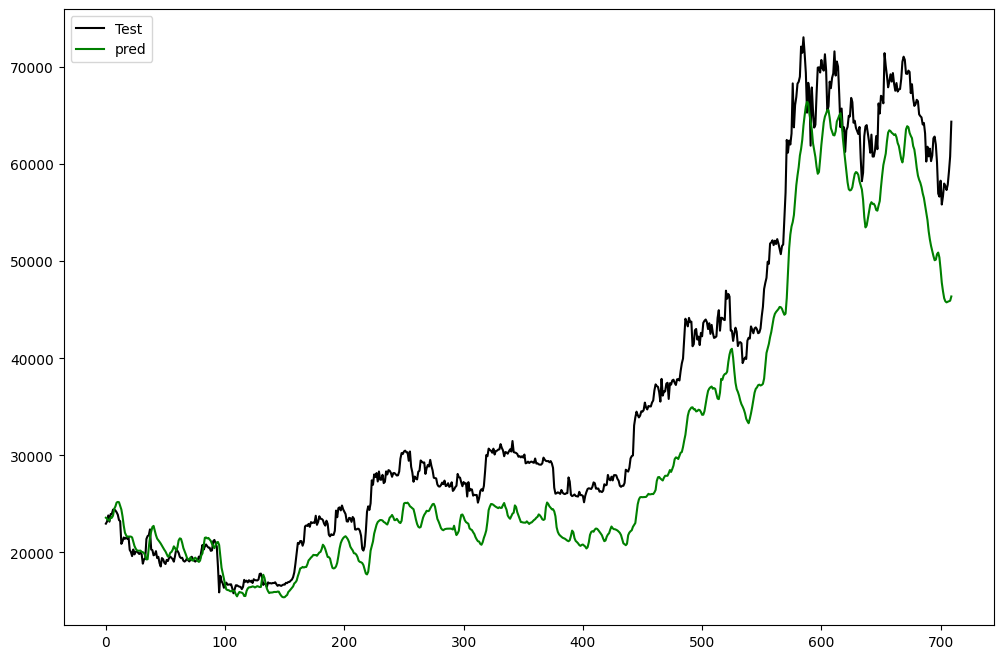

In [51]:
plt.figure(figsize=(12,8))
plt.plot(y_test * data_max[-1], color = 'black', label = 'Test')
plt.plot(y_pred * data_max[-1], color = 'green', label = 'pred')
plt.legend()
plt.show()